In [2]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

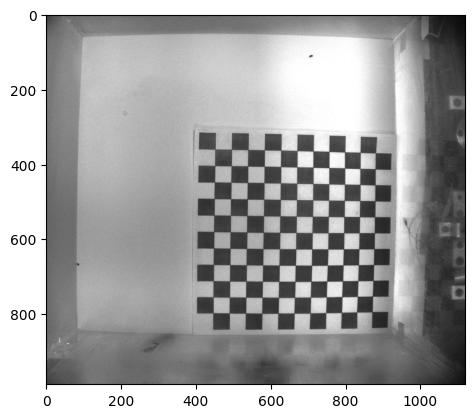

In [8]:
path = Path('/Users/yefan/Desktop/rot2/rot2-project/data/calibration-02132024172955-1.jpg')
img = cv2.imread(str(path))
plt.imshow(img)

In [9]:
# Define the checkerboard size
checkerboard_size = (11, 11)

# Find the corners of the checkerboard in the image
ret, corners = cv2.findChessboardCorners(img, checkerboard_size)

# If the corners are found, calibrate the camera
if ret:
    # Define the world coordinates of the checkerboard corners
    world_points = np.zeros((np.prod(checkerboard_size), 3), dtype=np.float32)
    world_points[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)

    # Calibrate the camera
    ret, camera_matrix, distortion_coeffs, rvecs, tvecs = cv2.calibrateCamera([world_points], [corners], img.shape[:2], None, None)

    # Print the camera matrix and distortion coefficients
    print("Camera Matrix:")
    print(camera_matrix)
    print("Distortion Coefficients:")
    print(distortion_coeffs)
else:
    print("Checkerboard corners not found in the image.")


Camera Matrix:
[[1.25419061e+03 0.00000000e+00 4.02419185e+02]
 [0.00000000e+00 1.25853955e+03 4.98682362e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion Coefficients:
[[-9.69911772e-02 -1.73517517e+00 -3.56507543e-03  2.49220264e-02
   5.46161965e+00]]


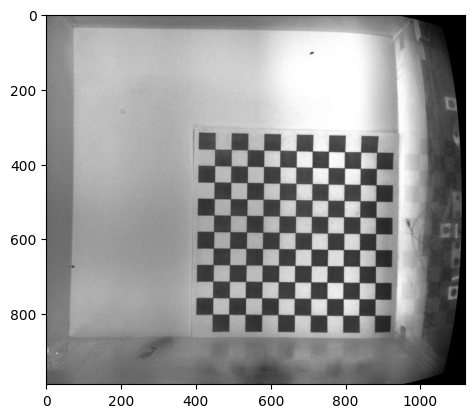

In [10]:
# Undistort the image
undistorted_img = cv2.undistort(img, camera_matrix, distortion_coeffs)

# Display the undistorted image
plt.imshow(undistorted_img)


In [12]:
def perform_homography_transform(image, src_points, dst_points):
    # Convert the source and destination points to numpy arrays
    src_points = np.array(src_points, dtype=np.float32)
    dst_points = np.array(dst_points, dtype=np.float32)

    # Calculate the homography matrix
    H, _ = cv2.findHomography(src_points, dst_points)

    # Apply the perspective transformation to the image
    transformed_image = cv2.warpPerspective(image, H, (image.shape[1], image.shape[0]))

    return transformed_image

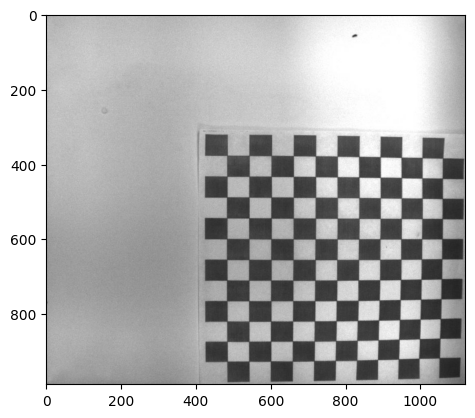

In [13]:
width, height = img.shape[1], img.shape[0]
corners = [(98, 61), (927, 69), (83, 843), (923, 852)]
dst_points = [(0, 0), (width, 0), (0, height), (width, height)]
transformed_img = perform_homography_transform(img, corners, dst_points)
plt.imshow(transformed_img)